# RegEx

In [35]:
import re

In [36]:
from IPython.display import Image

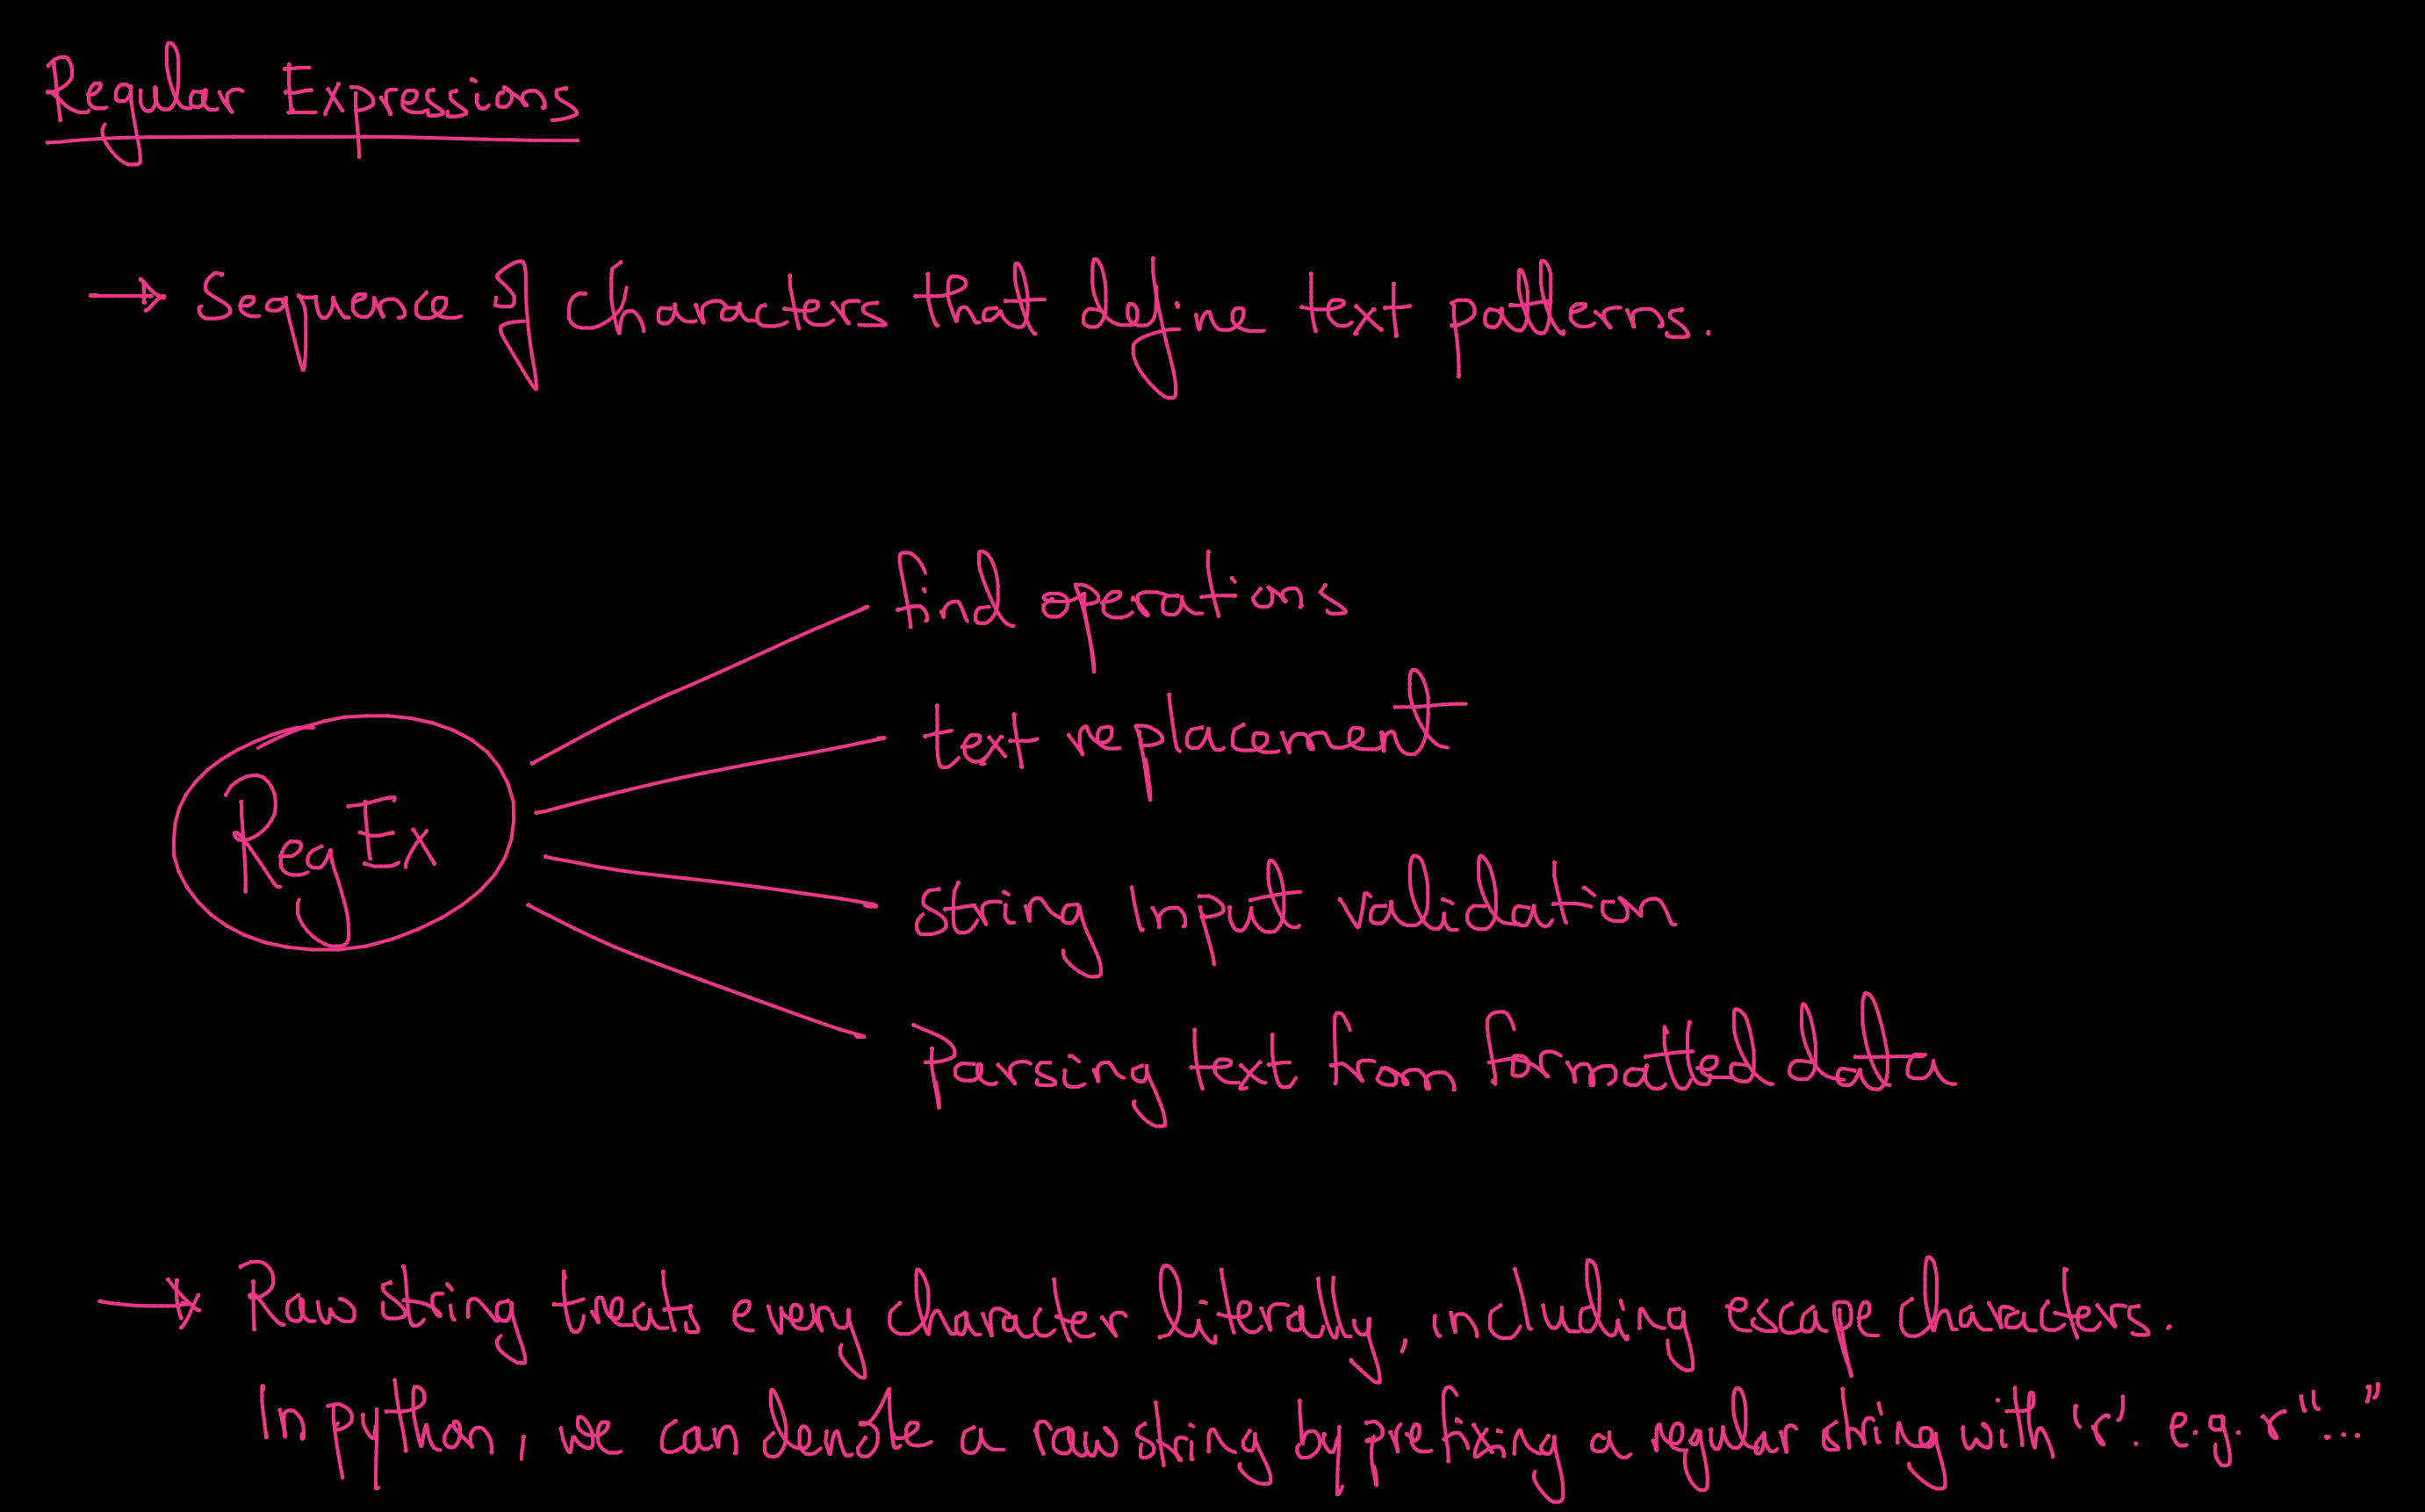

In [2]:
Image(filename='./resources/regex1.png') 

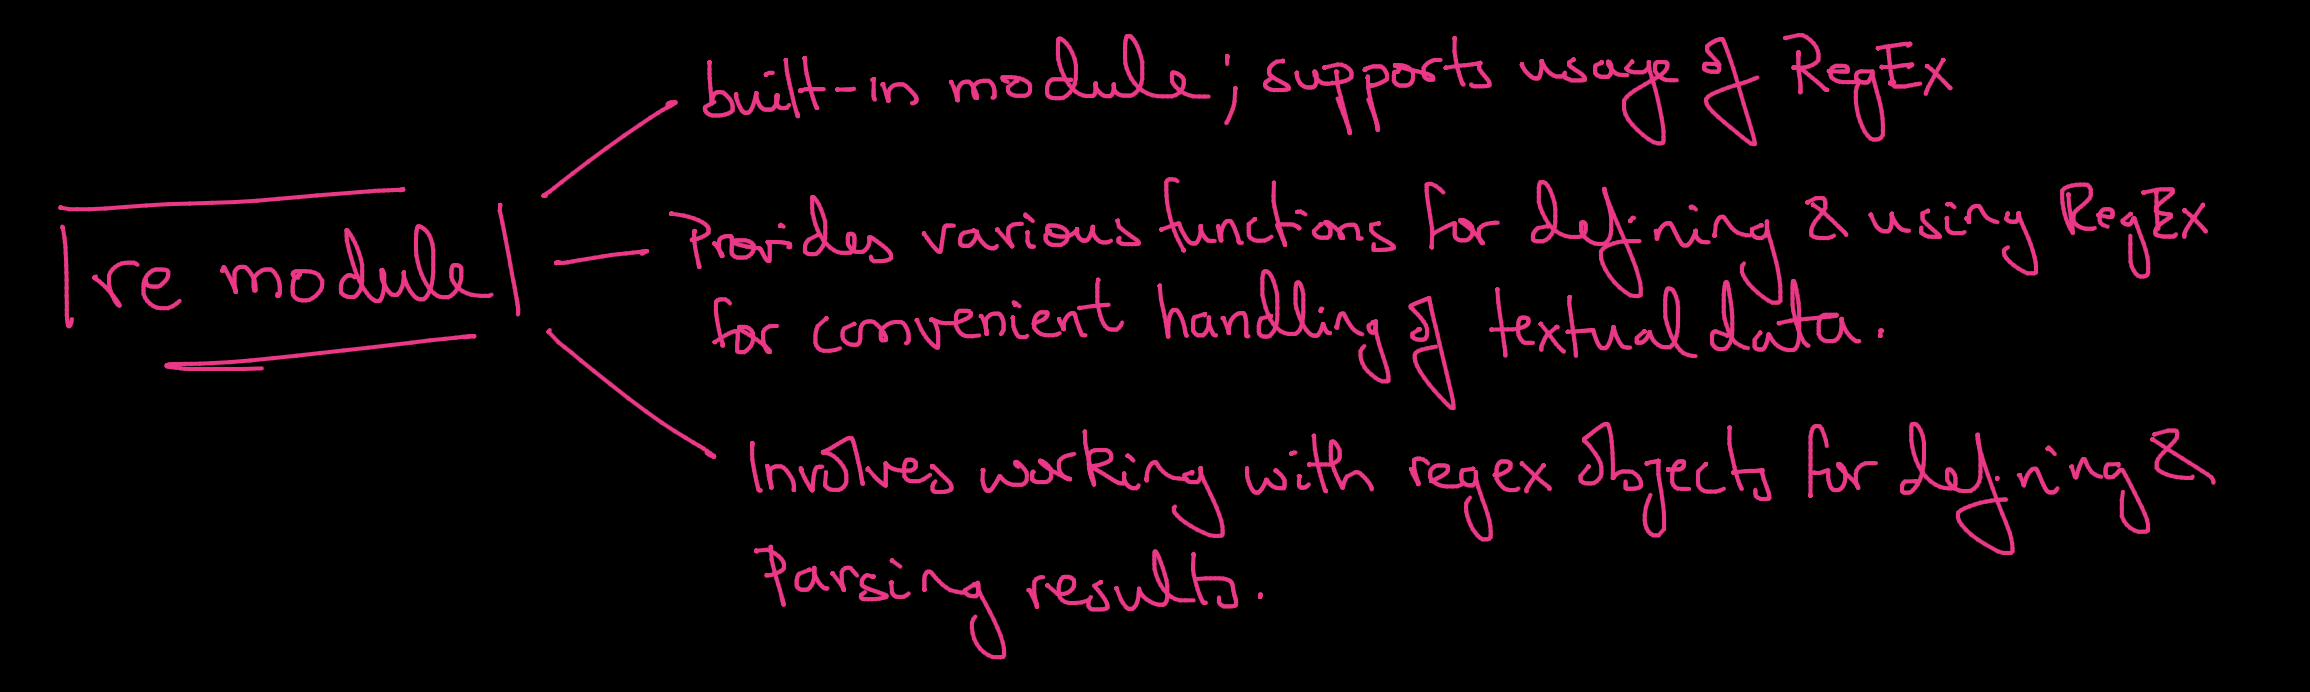

In [3]:
Image(filename='./resources/regex2.png')

In [11]:
mega_string = (
"""abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890

Ha HaHa

MetaCharacters (Need to be escaped):
.[{()\^$|?*+

coreyms.com 

321-555-4321
123.555.1234


Mr. Schafer
Mr Smith
Ms Davis
Mrs. Robinson
Mr. T

CoreyMSchafer@gmail.com
corey.schafer@university.edu
corey-321-schafer@my-work.net

https://www.google.com
http://coreyms.com
https://youtube.com
https://www.nasa.gov

Your toaster will be smarter than you
Robots will never rule the world.

KeItH sAyS yOu NeEd To LeArN rEgExEs?
""")

## Search Operations

re module provides 4 functions to perform searching operations over a string:

1. match 
    - searches for substring at the begining of a string
    - returns a 'match' object only if found else None.

2. search
   - searches for substring anywhere in the string
   - returns only the first occurance as a 'match' object

3. findall
   - searches for all substrings
   - returns a list of all substrings found

4. finditer
    - searches for all substrings
    - returns an iterator of 'match' objects of all substrings

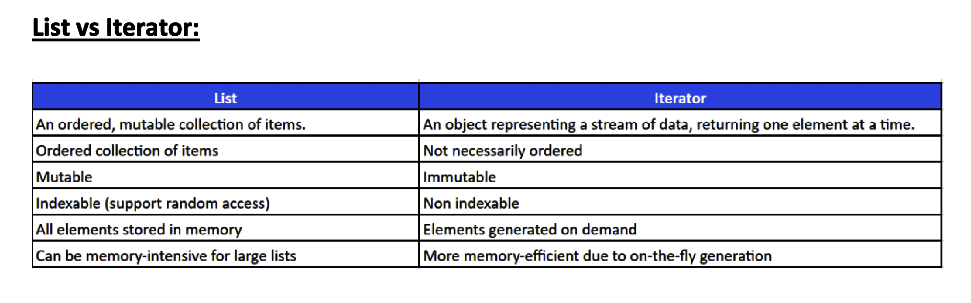

In [2]:
Image(filename='./resources/regex3.png') 

In [13]:
pattern = re.compile(r"abc")

In [14]:
match = re.match(pattern, mega_string)

In [15]:
match

<re.Match object; span=(0, 3), match='abc'>

In [17]:
match.group()

'abc'

In [21]:
start_index, end_index = match.span()

In [23]:
pattern = re.compile(r"re")
match = re.search(pattern, mega_string)

In [24]:
match

<re.Match object; span=(128, 130), match='re'>

In [25]:
mega_string[128:130]

're'

In [31]:
pattern = re.compile(r"re")
matches = re.findall(pattern, mega_string)

In [32]:
matches

['re', 're', 're', 're', 're']

In [33]:
pattern = re.compile(r'http')
matches = re.finditer(pattern, mega_string) 

In [34]:
for match in matches:
    print(match)

<re.Match object; span=(303, 307), match='http'>
<re.Match object; span=(326, 330), match='http'>
<re.Match object; span=(345, 349), match='http'>
<re.Match object; span=(365, 369), match='http'>


## Meta Characters

- These are special characters, whith each one having a uniques meaning in the context of string matching.
- Help in creating complex patterns conveniently with less code

In [39]:
'''
.       - Any Character Except New Line
^       - Beginning of a String
$       - End of a String
[]      - a set of characters
[^ ]    - Matches Characters NOT in brackets
|       - Either Or
( )     - capture and group
*       - 0 or More
+       - 1 or More
?       - 0 or One
{3}     - Exactly the specified number of occurrences
{3,4}   - Range of Numbers (Minimum, Maximum)
\       -  signals a special sequence (can also be used to escape special characters)
'''
print()

## Character Sets

- a character set in regular expressions refers to a combination of characters that can be used for complex and flexible pattern matching
- typically, they are defined using square brackets [] and allow you to match any one of the characters within the brackets
- character sets can be user-defined or pre-defined

In [41]:
'''
\d      - Digit (0-9) 
\D      - Not a Digit (0-9) 
\w      - Word Character (a-z, A-Z, 0-9, _)
\W      - Not a Word Character
\s      - Whitespace (space, tab, newline)
\S      - Not Whitespace (space, tab, newline)

\b      - Word Boundary - matches anu whitespace of non-alphanumeric character b4 or after character(s) (useful for identifying individual words in a string)
\B      - Not a Word Boundary
'''
print()

In [45]:
pattern = re.compile(r"Ha")
matches = re.finditer(pattern, mega_string)

for match in matches:
    print(match)

<re.Match object; span=(66, 68), match='Ha'>
<re.Match object; span=(69, 71), match='Ha'>
<re.Match object; span=(71, 73), match='Ha'>


In [46]:
pattern = re.compile(r"\bHa")
matches = re.finditer(pattern, mega_string)

for match in matches:
    print(match)

<re.Match object; span=(66, 68), match='Ha'>
<re.Match object; span=(69, 71), match='Ha'>


## Quantifiers

- specify the number of times that a character, group, or character class must occur to make a match
- they are used to define the permissible number of repetitions for the preceding element
- can be categorized as greedy (largest first) and non-greedy (smallest first)

In [47]:
'''
Greedy Quantifiers: Try to match as many character as possible
*       - 0 or More
+       - 1 or More
?       - 0 or One
{3}     - Exact Number
{3,4}   - Range of Numbers (Minimum, Maximum)

Quantifiers: Try to match as few character as possible
*?       - 0 or More
+?       - 1 or More
??       - 0 or One
{3}?     - Exact Number
{3,4}?   - Range of Numbers (Minimum, Maximum)

'''
print()

In [49]:
test_string = "<div>First div</div><div>Second div</div>"

In [54]:
pattern = re.compile(r'<\w+>.*</\w+>')
matches = re.findall(pattern, test_string)
matches

['<div>First div</div><div>Second div</div>']

In [55]:
pattern = re.compile(r'<\w+>.*?</\w+>')
matches = re.findall(pattern, test_string)
matches

['<div>First div</div>', '<div>Second div</div>']

## Grouping

- used for identifying group(s) of matching substrings within a larger string
- useful for extracting specific parts of a string which could provide useful information
- characters to form a group are mentioned within parentheses ()
- by default, the captured groups are stored for later use
- groups allow the useage of back-references

In [56]:
'''
1. capture groups
    - by default, all groups are 'capture groups' until explicitly altered
    - by default, all identifie groups are assigned integral names
    - syntax: (pattern)

2. named capture groups
    - behaves similarly like capture groups 
    - each group can be given a name explicitly
    - this improves redability and group access
    - syntax: (?P<group_name>pattern)

3. back-references
    - used for referencing captured groups by short-hand notation
    - mainly used when some parts of the pattern repeat
    - syntax: \group_index
    - syntax: (?P=group_name)

4. non-capture groups
    - the 'groups' aren't captured for later use
    - syntax: (?:pattern)

5. alternation
    - allows to match any pattern from listed alternatives
    - implemented by using the | (pipe) symbol 
'''
print()

In [74]:
pattern = re.compile(r'(\d{3}).?(\d{3}).?(\d{4})')
matches = re.finditer(pattern, mega_string)

for match in matches:
    print(match.group())

1234567890
321-555-4321
123.555.1234


In [81]:
pattern = re.compile(r'(\d{3}).?(\d{3}).?(\d{4})')
matches = re.finditer(pattern, mega_string)

for match in matches:
    print(match.groups())

('123', '456', '7890')
('321', '555', '4321')
('123', '555', '1234')


In [83]:
pattern = re.compile(r'(\d{3}).?(\d{3}).?(\d{4})')
matches = re.finditer(pattern, mega_string)

for match in matches:
    print(match.group(1))

123
321
123


In [93]:
test_string = "123 123"
pattern = re.compile(r"(\d{3}) \1")
matches = re.findall(pattern, test_string)

matches

['123']

In [96]:
pattern = re.compile(r"(?:https?://)(?:www\.)?(\w+)\.(?:\w+)")

matches = re.findall(pattern, mega_string)

matches

['google', 'coreyms', 'youtube', 'nasa']

In [104]:
pattern = re.compile(r"Mr?s?.? \w+")
matches = re.findall(pattern, mega_string)

matches

['Mr. Schafer', 'Mr Smith', 'Ms Davis', 'Mrs. Robinson', 'Mr. T']

In [105]:
pattern = re.compile(r"(Mr|Ms|Mrs).? \w+")
matches = re.finditer(pattern, mega_string)

for match in matches:
    print(match)

<re.Match object; span=(168, 179), match='Mr. Schafer'>
<re.Match object; span=(180, 188), match='Mr Smith'>
<re.Match object; span=(189, 197), match='Ms Davis'>
<re.Match object; span=(198, 211), match='Mrs. Robinson'>
<re.Match object; span=(212, 217), match='Mr. T'>


## Modifications

- involves splitting a string or replacing parts of a string
- the re module provides the split and sub functions to achieve this

In [103]:
'''
1. split
    - allows to split a string on any matched pattern
    - works similar to python's str.split function, with the additional flexibility of regular expressions
    - syntax: re.split(pattern, string)

2. substitution
    - allows to replace a part of a string with any matched pattern
    - useful for search and replace operations with the added flexibility of regular expression
    - syntax: re.sub(pattern, replacement, string)
'''
print()

In [107]:
test_string = "This is the first sentence. This is the second sentence! This is the third sentence?"

In [111]:
pattern = re.compile(r"[.!?]")
matches = re.split(pattern, test_string)

for sentence in matches[:-1]:
    print(sentence.strip())

This is the first sentence
This is the second sentence
This is the third sentence


In [106]:
print(mega_string)

abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890

Ha HaHa

MetaCharacters (Need to be escaped):
.[{()\^$|?*+

coreyms.com 

321-555-4321
123.555.1234


Mr. Schafer
Mr Smith
Ms Davis
Mrs. Robinson
Mr. T

CoreyMSchafer@gmail.com
corey.schafer@university.edu
corey-321-schafer@my-work.net

https://www.google.com
http://coreyms.com
https://youtube.com
https://www.nasa.gov

Your toaster will be smarter than you
Robots will never rule the world.

KeItH sAyS yOu NeEd To LeArN rEgExEs?



In [117]:
pattern = re.compile(r'(https?://)(www.)?(\w+).(\w+)')
replaced_string = re.sub(pattern, r'\3.\4.au', mega_string)

In [118]:
print(replaced_string)

abcdefghijklmnopqurtuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
1234567890

Ha HaHa

MetaCharacters (Need to be escaped):
.[{()\^$|?*+

coreyms.com 

321-555-4321
123.555.1234


Mr. Schafer
Mr Smith
Ms Davis
Mrs. Robinson
Mr. T

CoreyMSchafer@gmail.com
corey.schafer@university.edu
corey-321-schafer@my-work.net

google.com.au
coreyms.com.au
youtube.com.au
nasa.gov.au

Your toaster will be smarter than you
Robots will never rule the world.

KeItH sAyS yOu NeEd To LeArN rEgExEs?



## Lookahead and Lookbehind Assertions

- lookahead and lookbehind assertions are powerful tools in regular expressions that allow for complex pattern matching based on the context in which a pattern appears
- they are used to match a pattern only if it is followed or preceded by another specified pattern

In [119]:
'''
1. Lookahead Assertion:

    - Positive lookahead assertion
        - syntax: X(?=Y)

    - Negative lookahead assertion
        - syntax: X(?!Y)

2. Lookbehind Assertion:

    - Positive lookbehind assertion
        - syntax: (?<=Y)X

    - Negative lookbehind assertion
        - syntax: (?<!Y)X
'''
print()

## Flags

- flags provide additional control over pattern matching by altering the behaviour of regular expressions
- can be used fort insensitive case matching, making the dot operator match newline character, etc.
- flags are usually passed as arguments to functions of re module

# Practice

### 1) extracting all email addresses form given test

In [127]:

text = """
Hello John, please contact us at support@example.com for further assistance.
You can also reach out to our manager at manager@example.org or sales@example.net.
Thank you, support@example.com.
"""

In [128]:
pattern = re.compile(r'\w+@\w+\.\w+')
matches = re.findall(pattern, text)

matches

['support@example.com',
 'manager@example.org',
 'sales@example.net',
 'support@example.com']

### 2) validate phone numbers and callout invalid ones

- valid format: (XXX) XXX-XXXX

In [132]:
phone_numbers = [
    "(123) 456-7890",
    "(987) 654-3210",
    "123-456-7890",
    "(123)456-7890",
    "(123) 456-7890"
]

In [133]:
pattern = re.compile(r'\(\d{3}\)\s\d{3}-\d{4}')

In [134]:
for i, number in enumerate(phone_numbers,start=1):
    if re.match(pattern, number) is None:
        print(f'Number {i} is Invalid : {number}')

Number 3 is Invalid : 123-456-7890
Number 4 is Invalid : (123)456-7890


### 3) display all the numbers above in valid format

In [135]:
phone_numbers = [
    "(123) 456-7890",
    "(987) 654-3210",
    "123-456-7890",
    "(123)456-7890",
    "(123) 456-7890"
]

In [143]:
pattern = re.compile(r'\(?(\d{3})\)?-?\s?(\d{3})-(\d{4})')

In [147]:
for number in phone_numbers:
    valid_format = re.sub(pattern, r'(\1) \2-\3', number)
    print(valid_format)

(123) 456-7890
(987) 654-3210
(123) 456-7890
(123) 456-7890
(123) 456-7890


###  4) Identify dates & modify format to YYYY-MM-DD from below text

In [154]:
text = "We have meetings scheduled on 12/05/2023, 23/06/2024, and 07/07/2025."

In [155]:
pattern = re.compile(r'(?P<day>\d{2})/(?P<month>\d{2})/(?P<year>\d{4})')

In [169]:
re.sub(pattern, r"\3-\2-\1", text)

'We have meetings scheduled on 2023-05-12, 2024-06-23, and 2025-07-07.'

### 5) Extract URLs from given text

In [183]:
text = """
Visit our website at https://www.example.com for more information.
You can also check out our blog at http://blog.example.com or follow us on https://twitter.com/example.
"""

In [186]:
pattern = re.compile(r'https?://(www\.)?[\w\.]+(/\w+)?')
matches = re.finditer(pattern, text)

for match in matches:
    print(match.group())

https://www.example.com
http://blog.example.com
https://twitter.com/example


### 6) Extract all sentences from below text

In [192]:
text = "Hello world! How are you doing today? This is a great day. Let's make the most of it."

In [193]:
pattern = re.compile(r'[!\.?]')
matches = re.split(pattern, text)

for sentence in matches:
    if sentence:
        print(sentence.strip())

Hello world
How are you doing today
This is a great day
Let's make the most of it


### 7) Validate passwords based on following conditions:

- atleast 8 characters in length
- atleast one lowercase alphabet
- atleast one uppercase alphabet
- atleast one numeric digit

In [209]:
passwords = [
    "Password123",
    "pass123",
    "PASSWORD123",
    "Pass123",
    "ValidPass1"
]

In [210]:
validation1 = re.compile(r'.{8,}')
validation2 = re.compile(r'[a-z]+')
validation3 = re.compile(r'[A-Z]+')
validation4 = re.compile(r'[0-9]+')

In [211]:
for password in passwords:
    for validation in (validation1, validation2, validation3, validation4):
        if validation.search(password) is None:
            print(f'Invalid Password: {password}, Failed Condition: {validation.pattern} ')
            break

Invalid Password: pass123, Failed Condition: .{8,} 
Invalid Password: PASSWORD123, Failed Condition: [a-z]+ 
Invalid Password: Pass123, Failed Condition: .{8,} 


In [212]:
pattern = re.compile(r"^(?=.*[a-z])(?=.*[A-Z])(?=.*[0-9])[a-zA-Z0-9]{8,}")